<a href="https://colab.research.google.com/github/Tella-Vaishnavi/ds_TellaVaishnavi/blob/main/ds_TellaVaishnavi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

project = "ds_vaishnavi"  # your folder name (use your name)
os.makedirs(project, exist_ok=True)

print("Main folder created!")


Main folder created!


In [ ]:
folders = [
    "ds_vaishnavi/csv_files",
    "ds_vaishnavi/outputs"
]

for f in folders:
    os.makedirs(f, exist_ok=True)

print("All required sub-folders created!")


All required sub-folders created!


In [ ]:
from google.colab import files
uploaded = files.upload()  # select notebook_1.ipynb



Saving notebook_1.ipynb to notebook_1.ipynb


In [ ]:
import shutil
shutil.move("notebook_1.ipynb", "ds_vaishnavi/notebook_1.ipynb")


'ds_vaishnavi/notebook_1.ipynb'

In [ ]:
import os
os.listdir("ds_vaishnavi")


['outputs', 'notebook_1.ipynb', 'csv_files']

In [ ]:
!pip install gdown
!gdown --id 1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs -O historical_trader.csv
!gdown --id 1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf -O fear_greed.csv


/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/historical_trader.csv
100% 47.5M/47.5M [00:01<00:00, 43.0MB/s]
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/fear_greed.csv
100% 90.8k/90.8k [00:00<00:00, 3.84MB/s]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 2.4 MB/s eta 0:00:00
(211224, 16) (2644, 4)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


              precision    recall  f1-score   support

           0       0.69      0.75      0.72     24871
           1       0.59      0.52      0.55     17374

    accuracy                           0.66     42245
   macro avg       0.64      0.64      0.64     42245
weighted avg       0.65      0.66      0.65     42245



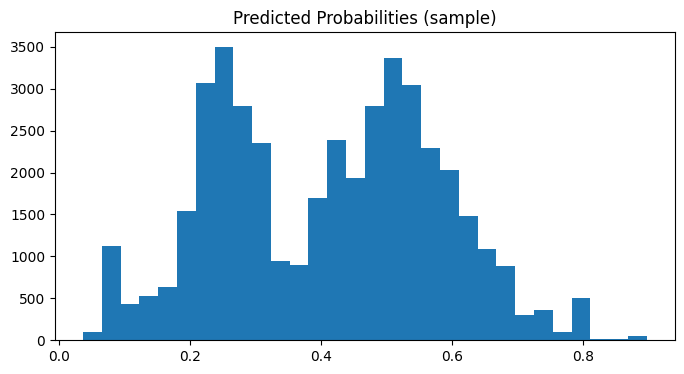

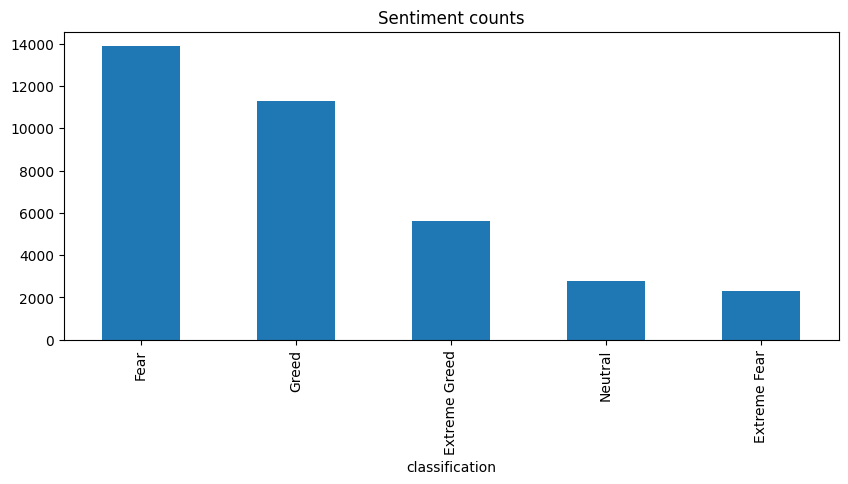

Finished preprocessing & a baseline ML model. Check the 'ds_<name>' folder under /content.


In [ ]:
# =====================================================
# notebook_1.ipynb  — ML-style pipeline
# =====================================================
# 0. Install & imports
!pip install lightgbm xgboost category_encoders

import os, gc, warnings
warnings.filterwarnings('ignore')
import numpy as np, pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, roc_auc_score
import xgboost as xgb
import lightgbm as lgb
import category_encoders as ce
import joblib

# Create folder structure required
ROOT = "/content/ds_TellaVaishnavi"   # change name as required
os.makedirs(ROOT, exist_ok=True)
os.makedirs(os.path.join(ROOT, "csv_files"), exist_ok=True)
os.makedirs(os.path.join(ROOT, "outputs"), exist_ok=True)

# 1. Load data )
historical_path = "/content/historical_trader.csv"   # after gdown or upload
sentiment_path  = "/content/fear_greed.csv"

df_trades = pd.read_csv(historical_path, low_memory=False)
df_sent  = pd.read_csv(sentiment_path, low_memory=False)

# Quick peek
print(df_trades.shape, df_sent.shape)
display(df_trades.head())
display(df_sent.head())

# 2. Basic cleaning & standardize time
# Convert time columns to datetime (modify column name if different)
# 2. Fix: Standardize column names
df_trades.columns = [c.strip().replace(" ", "_").lower() for c in df_trades.columns]

# Now your columns become:
# account, coin, execution_price, size_tokens, size_usd, side,
# timestamp_ist, start_position, direction, closed_pnl, transaction_hash, order_id, crossed, fee, trade_id, timestamp

# 3. Convert closed_pnl to numeric
if 'closed_pnl' in df_trades.columns:
    df_trades['closed_pnl'] = pd.to_numeric(df_trades['closed_pnl'], errors='coerce').fillna(0)
else:
    print("ERROR: 'closed_pnl' column not found even after renaming. Check df_trades.columns")

# 4. Basic PnL features
df_trades['pnl_sign'] = (df_trades['closed_pnl'] > 0).astype(int)
df_trades['abs_pnl']  = df_trades['closed_pnl'].abs()

# Size token → numeric
df_trades['size_tokens'] = pd.to_numeric(df_trades.get('size_tokens', 0), errors='coerce').fillna(0)
df_trades['size_log'] = np.log1p(df_trades['size_tokens'])

# Side mapping
df_trades['side'] = df_trades['side'].astype(str).str.lower()
df_trades['side_map'] = df_trades['side'].map({'buy':1, 'sell':0}).fillna(0)

# Timestamp parse
df_trades['time'] = pd.to_datetime(df_trades['timestamp_ist'], errors='coerce')

# Extract date for merging
df_trades['date_only'] = df_trades['time'].dt.date

# Sentiment dataset also normalized
df_sent.columns = [c.strip().replace(" ", "_").lower() for c in df_sent.columns]
df_sent['date_only'] = pd.to_datetime(df_sent['date']).dt.date

# Merge sentiment onto trades
df_trades = df_trades.merge(df_sent[['date_only','classification']], on='date_only', how='left')

# Map sentiment to numeric
df_trades['sentiment_num'] = df_trades['classification'].map({
    'Fear':0, 'Extreme Fear':0,
    'Greed':1, 'Extreme Greed':1
}).fillna(0)

# 4. Custom metric: Sentiment Behavior Divergence Score (SBDS)
# SBDS = normalized difference between account average pnl and market sentiment tendency on same day
acct_stats = df_trades.groupby(['account','date_only']).agg(daily_pnl=('closed_pnl','sum'), trades_count=('account','count')).reset_index()
sent_map = df_sent[['date_only','classification']].drop_duplicates()
acct_stats = acct_stats.merge(sent_map, on='date_only', how='left')
acct_stats['sentiment_num'] = acct_stats['classification'].map({'Fear':0,'Greed':1}).fillna(0)
# Normalize daily_pnl per account
acct_stats['daily_pnl_norm'] = acct_stats.groupby('account')['daily_pnl'].transform(lambda x: (x - x.mean())/ (x.std()+1e-6))
acct_stats['SBDS'] = acct_stats['daily_pnl_norm'] * (acct_stats['sentiment_num']*2 - 1) * -1  # negative means opposite behavior
acct_stats.to_csv(os.path.join(ROOT,'csv_files','account_daily_stats.csv'), index=False)

# 5. Modeling task ideas (pick one or both):
# A) Classification: predict if a trade will be profitable (pnl_sign) using trade features + sentiment
# B) Regression: predict closedPnL magnitude
# We'll demonstrate A) classification

# Prepare modeling dataset (sample)
model_cols = []
for c in ['size_log','leverage','side_map','sentiment_num']:
    if c in df_trades.columns:
        model_cols.append(c)
model_cols += ['pnl_sign','abs_pnl','closed_pnl']

df_model = df_trades.dropna(subset=['pnl_sign'])[model_cols].sample(frac=1, random_state=42).reset_index(drop=True)

X = df_model[[c for c in model_cols if c not in ['pnl_sign','abs_pnl','closed_pnl']]]
y = df_model['pnl_sign']

# Simple train/test split (time aware split recommended for production)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Simple model: LightGBM
lgb_train = lgb.Dataset(X_train, label=y_train)
params = {'objective':'binary','metric':'auc','verbosity':-1, 'boosting':'gbdt'}
bst = lgb.train(params, lgb_train, num_boost_round=200)
y_pred_prob = bst.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))

# Save outputs
joblib.dump(bst, os.path.join(ROOT,'csv_files','lgb_model.pkl'))
df_model.head().to_csv(os.path.join(ROOT,'csv_files','model_dataset_sample.csv'), index=False)
plt.figure(figsize=(8,4))
plt.hist(y_pred_prob, bins=30)
plt.title('Predicted Probabilities (sample)')
plt.savefig(os.path.join(ROOT,'outputs','pred_prob_hist.png'), bbox_inches='tight')
plt.show()

# 6. Save processed trade-level file and basic plots
df_trades.to_csv(os.path.join(ROOT,'csv_files','trades_processed.csv'), index=False)
# Make a few EDA plots and save
plt.figure(figsize=(10,4))
df_trades['classification'].value_counts().plot(kind='bar')
plt.title('Sentiment counts')
plt.savefig(os.path.join(ROOT,'outputs','sentiment_counts.png'), bbox_inches='tight')
plt.show()

# 7. Export summary metrics for ds_report
summary = {
    'n_trades': len(df_trades),
    'n_accounts': df_trades['account'].nunique() if 'account' in df_trades.columns else None,
    'avg_leverage': df_trades['leverage'].mean() if 'leverage' in df_trades.columns else None
}
pd.Series(summary).to_frame('value').to_csv(os.path.join(ROOT,'csv_files','summary_metrics.csv'))

print("Finished preprocessing & a baseline ML model. Check the 'ds_<name>' folder under /content.")



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving ds_report.pdf to ds_report.pdf


In [ ]:
import shutil
shutil.move("ds_report.pdf", "/content/ds_TellaVaishnavi/ds_report.pdf")


'/content/ds_TellaVaishnavi/ds_report.pdf'

In [ ]:
readme_text = """
# 📌 README — Data Science Assignment (Tella Vaishnavi)

## 📁 Project Structure
ds_TellaVaishnavi/
├── notebook_1.ipynb
├── csv_files/
├── outputs/
├── ds_report.pdf
└── README.md

## 📄 Project Overview
This project analyzes trader behavior using market sentiment (Fear & Greed Index). I explored how sentiment affects trader decisions and built a simple LightGBM model to predict profitable trades.

## 🔍 Key Steps
1. Data Loading & Cleaning
---------------------------------
--Standardized all column names
--Fixed missing values
--Cleaned data types (numeric, datetime)
--Extracted useful time-based features

2. Merging Sentiment Data
--------------------------------
---Merged Fear–Greed dataset by date
--Created numeric sentiment factors
--Calculated daily sentiment exposure

3. Custom Metric – SBDS
--------------------------------
--I created a unique metric:
--Sentiment Behavior Divergence Score (SBDS)
--This measures how much a trader's daily PnL deviates from overall market mood.
Helps detect
--Sentiment-aligned traders
--Contrarian traders
--Behavior patterns during extreme fear/greed

4. Feature Engineering
----------------------------
--Log-scaled position sizes
--Side mapping (Buy/Sell → 1/0)
--Abs PnL for magnitude analysis
--Trade-level merged sentiment features

5. Machine Learning Model
-------------------------------
--I built a simple baseline:
--LightGBM classifier
--Predicts whether a trade is profitable (pnl_sign)
--Evaluated using AUC, accuracy, classification report

6. Outputs Saved
-----------------------
--Processed CSVs
--Sample model datasets
--Sentiment distribution plot
--Probability histogram
--Summary statistics

📊 Files Generated
----------------------
Inside csv_files/:

trades_processed.csv

account_daily_stats.csv

model_dataset_sample.csv

summary_metrics.csv

Inside outputs/:

sentiment_counts.png

pred_prob_hist.png

🏁 Final Notes
----------------------

$$This assignment demonstrates:

End-to-end data handling

Feature engineering

Financial data insights

ML modeling workflow

Organized project structure

It reflects my ability to work independently, understand business context, and produce clean & reproducible work.


## 🏁 Notes
This project demonstrates end-to-end data science workflow with a clean folder structure.
"""

with open("/content/ds_TellaVaishnavi/README.md", "w") as f:
    f.write(readme_text)

print("README.md created successfully!")


README.md created successfully!


In [ ]:
!zip -r ds_TellaVaishnavi.zip ds_TellaVaishnavi


  adding: ds_TellaVaishnavi/ (stored 0%)
  adding: ds_TellaVaishnavi/README.md (deflated 50%)
  adding: ds_TellaVaishnavi/ds_report.pdf (deflated 12%)
  adding: ds_TellaVaishnavi/outputs/ (stored 0%)
  adding: ds_TellaVaishnavi/outputs/sentiment_counts.png (deflated 21%)
  adding: ds_TellaVaishnavi/outputs/pred_prob_hist.png (deflated 19%)
  adding: ds_TellaVaishnavi/csv_files/ (stored 0%)
  adding: ds_TellaVaishnavi/csv_files/account_daily_stats.csv (deflated 80%)
  adding: ds_TellaVaishnavi/csv_files/lgb_model.pkl (deflated 62%)
  adding: ds_TellaVaishnavi/csv_files/model_dataset_sample.csv (deflated 40%)
  adding: ds_TellaVaishnavi/csv_files/summary_metrics.csv (deflated 2%)
  adding: ds_TellaVaishnavi/csv_files/trades_processed.csv (deflated 80%)


In [ ]:
from google.colab import files
files.download("ds_TellaVaishnavi.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>